In [ ]:
1) IMPORT NECESSARY LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [ ]:
DATA FETCHING FROM YAHOO FINANCE

In [7]:
#pip install yfinance

In [8]:
# Get the data for wipro
ticker = "WIPRO.NS"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-06-30")

[*********************100%%**********************]  1 of 1 completed


In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,418.850006,422.850006,414.350006,416.399994,410.402557,7596943
2021-04-05,416.450012,427.899994,416.200012,425.450012,419.322205,21216395
2021-04-06,427.950012,428.899994,422.350006,427.149994,420.997711,8320520
2021-04-07,425.000000,439.000000,423.399994,438.000000,431.691467,13867650
2021-04-08,441.950012,445.950012,440.000000,442.100006,435.732452,12916614


In [ ]:
2) SELECT TARGET VARIABLE AND CLEAN DATA

In [5]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


In [ ]:
2.1) PLOT THE TIME SERIES

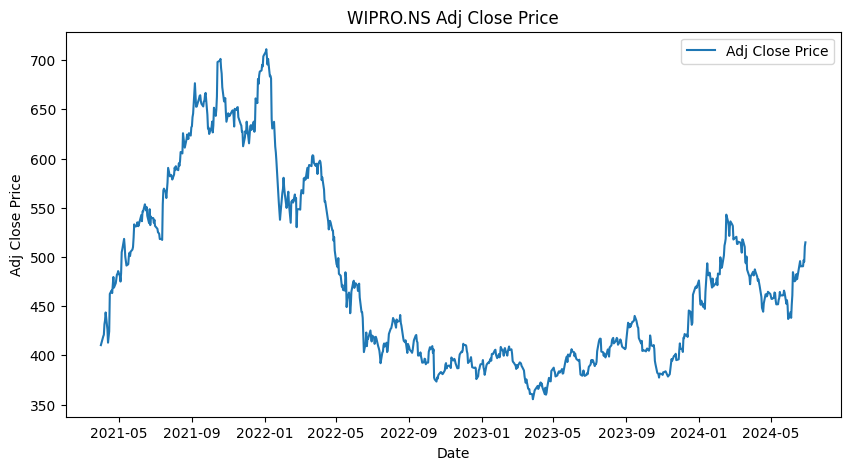

In [6]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('WIPRO.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


In [ ]:
2.2) DECOMPOSTION OF TIME SERIES

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
df.columns

Index(['Adj Close'], dtype='object')

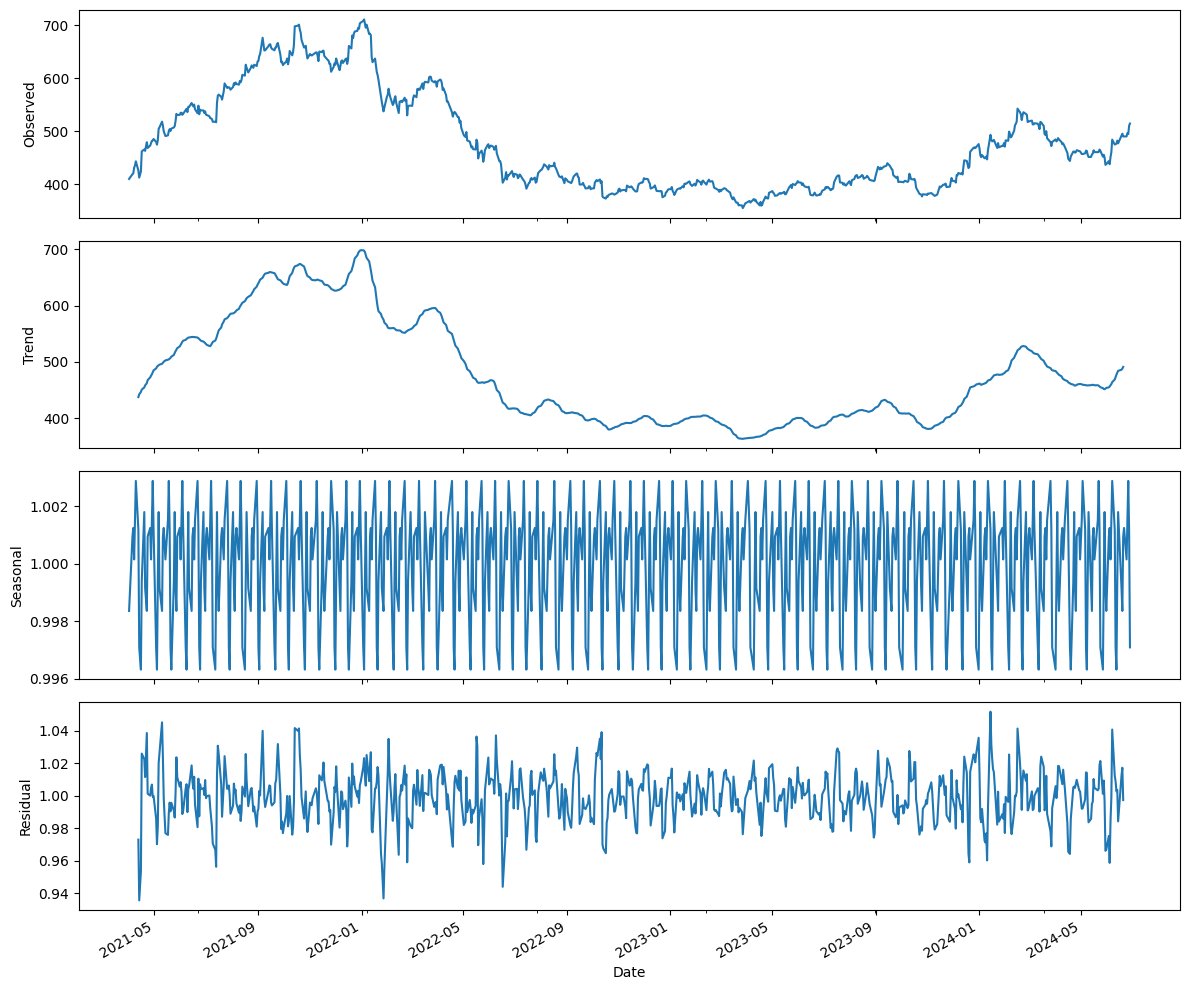

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [10]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [ ]:
UNIVARIATE FORECASTING HW MODEL

In [11]:
monthly_data = df.resample("ME").mean()

In [4]:
monthly_data.head()

NameError: name 'monthly_data' is not defined

In [12]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [13]:
len(monthly_data), len(train_data)

(39, 31)

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

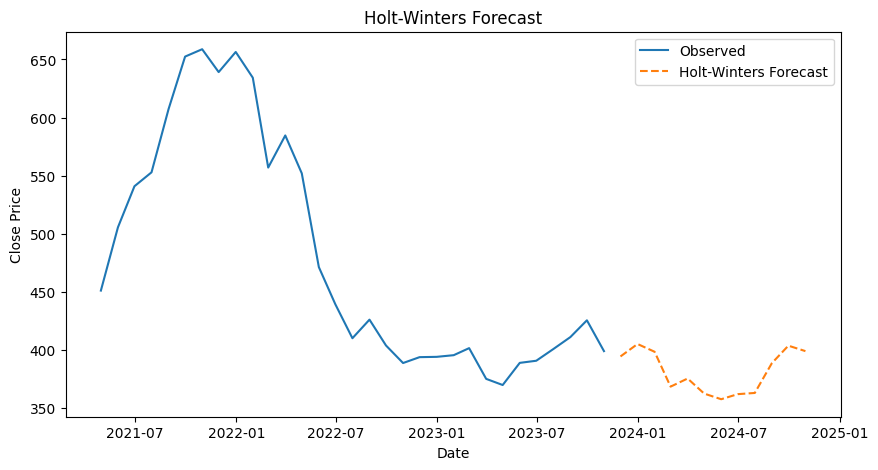

In [15]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [16]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [17]:
len(test_data), len(y_pred)

(8, 8)

In [18]:
y_pred, test_data

(2023-11-30    394.228870
 2023-12-31    404.944680
 2024-01-31    398.248648
 2024-02-29    368.227229
 2024-03-31    375.215672
 2024-04-30    362.240987
 2024-05-31    357.382524
 2024-06-30    361.746803
 Freq: ME, dtype: float64,
              Adj Close
 Date                  
 2023-11-30  391.165775
 2023-12-31  434.912482
 2024-01-31  468.332537
 2024-02-29  512.247625
 2024-03-31  503.591668
 2024-04-30  468.265001
 2024-05-31  456.495238
 2024-06-30  481.284207)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 98.99184730119255
MAE: 87.52316371591668
MAPE: nan
R-squared: -6.512012952071656


In [20]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [21]:
holt_winters_forecast

2023-11-30    394.228870
2023-12-31    404.944680
2024-01-31    398.248648
2024-02-29    368.227229
2024-03-31    375.215672
2024-04-30    362.240987
2024-05-31    357.382524
2024-06-30    361.746803
2024-07-31    362.778620
2024-08-31    388.408515
2024-09-30    403.507628
2024-10-31    398.811969
2024-11-30    394.228870
2024-12-31    404.944680
2025-01-31    398.248648
2025-02-28    368.227229
2025-03-31    375.215672
2025-04-30    362.240987
2025-05-31    357.382524
2025-06-30    361.746803
Freq: ME, dtype: float64

In [ ]:
Arima monthly Data

In [23]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [16]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [5]:
from pmdarima import auto_arima
import pandas as pd

# Assuming train_data['Adj Close'] is a pandas Series or DataFrame with your training data

# Fit ARIMA model using auto_arima
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [18]:
pip install --upgrade numpy


Note: you may need to restart the kernel to use updated packages.


In [1]:
len(forecast)

NameError: name 'forecast' is not defined

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

NameError: name 'np' is not defined

In [3]:
daily_data= df.copy()

NameError: name 'df' is not defined

In [6]:
from pmdarima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [7]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

NameError: name 'auto_arima' is not defined

In [8]:
# Fit auto_arima model
arima_model = ARIMA(df['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

NameError: name 'ARIMA' is not defined

In [9]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

NameError: name 'arima_model' is not defined

In [10]:
len(forecast)

NameError: name 'forecast' is not defined

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

NameError: name 'np' is not defined

In [12]:
# pip install tensorflow

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
import tensorflow as tf

# Check TensorFlow version
print(tf.__version__)


2.17.0


In [ ]:
Multivariate Forecasting - Machine Learning Models

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Now you can proceed with building your models using TensorFlow/Keras and other required libraries


In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,418.850006,422.850006,414.350006,416.399994,410.402557,7596943
2021-04-05,416.450012,427.899994,416.200012,425.450012,419.322205,21216395
2021-04-06,427.950012,428.899994,422.350006,427.149994,420.997711,8320520
2021-04-07,425.000000,439.000000,423.399994,438.000000,431.691467,13867650
2021-04-08,441.950012,445.950012,440.000000,442.100006,435.732452,12916614


In [12]:
df = data[['Adj Close']]

In [13]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [14]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (770, 30, 6)
Shape of y: (770,)


In [15]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.2108 - val_loss: 0.0117
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - val_loss: 0.0154
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0240 - val_loss: 0.0057
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - val_loss: 0.0190
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0368 - val_loss: 0.0137
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0220 - val_loss: 0.0254
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0505 - val_loss: 0.0171
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0210 - val_loss: 0.0237
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0530 - val_loss: 0.0134
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0183 - val_loss: 0.0168
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0403 - val_loss: 0.0099
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0

In [21]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


In [22]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 374.08088407642776, True Value: 380.0395202636719
Prediction: 373.9089599228064, True Value: 378.49279785156244
Prediction: 373.41380383881574, True Value: 380.8377990722656
Prediction: 373.0914530068154, True Value: 390.8165283203125
Prediction: 373.3609962349167, True Value: 396.2549133300781
Prediction: 374.3567500134262, True Value: 394.5585327148438
Prediction: 375.906723940725, True Value: 399.34832763671875
Prediction: 377.7275236573598, True Value: 399.79736328125
Prediction: 379.89309915320473, True Value: 399.3982238769531
Prediction: 382.05051289573726, True Value: 401.6434326171875


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 29.739504713292085
MAE: 26.22617740247997
MAPE: 5.9307918423477535
R-squared: 0.3392202871121094


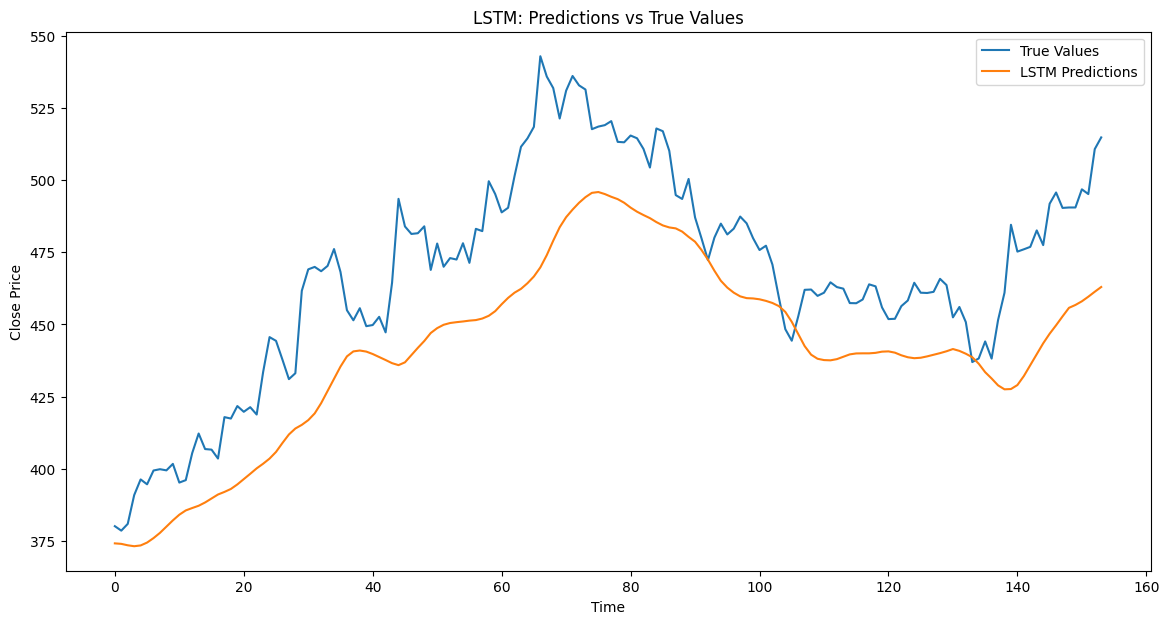

In [24]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [26]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

In [27]:
# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [28]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [29]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.001010069704808933


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.03178159380536057
MAE: 0.0213119441512991
MAPE: 278327.04955380684
R-squared: 0.9852681835619247


In [31]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.0005557775411272916


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.023574934594337512
MAE: 0.016485151776660503
MAPE: 260968.2578007764
R-squared: 0.991894012188158


In [33]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.338571780735479, True Value: 0.34500888114098005
Prediction: 0.23254388809238946, True Value: 0.27007909668315266
Prediction: 0.31028529737643173, True Value: 0.3069113990673621
Prediction: 0.2314654178640968, True Value: 0.20733682378204887
Prediction: 0.2865271190773052, True Value: 0.27134436217654156
Prediction: 0.6616453891386403, True Value: 0.6277111161887999
Prediction: 0.769303643211262, True Value: 0.7623758298424698
Prediction: 0.1000210991987539, True Value: 0.07561192610115042
Prediction: 0.1430876613790536, True Value: 0.14645435215377856
Prediction: 0.8692026433460599, True Value: 0.9149262115800879


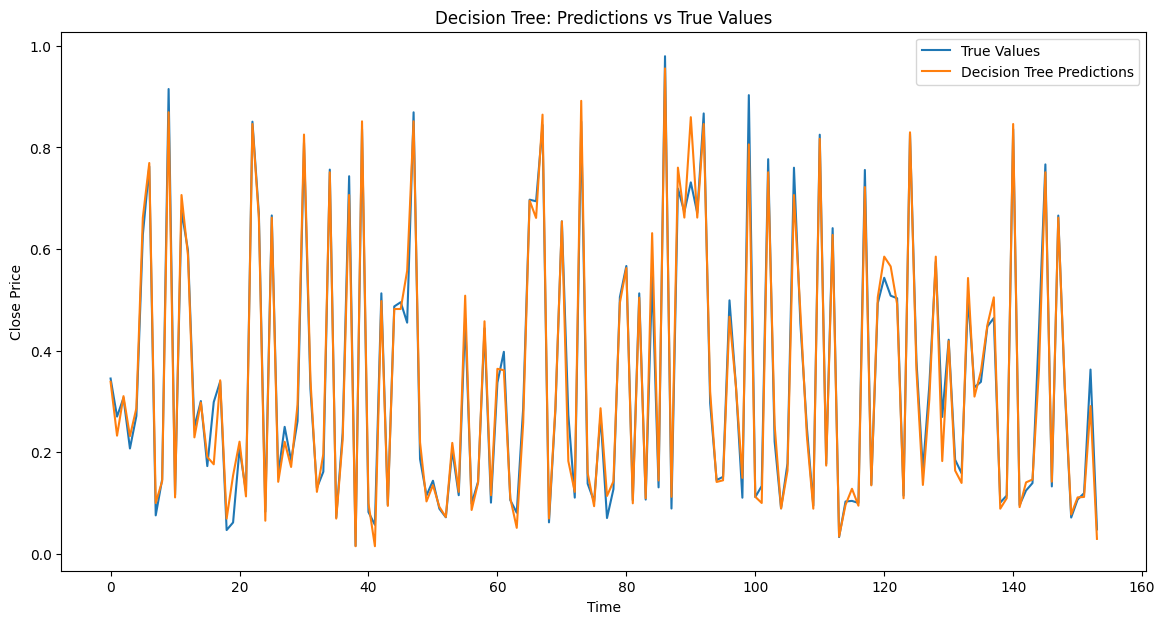

In [34]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [35]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.33131838759562726, True Value: 0.34500888114098005
Prediction: 0.2167379471792414, True Value: 0.27007909668315266
Prediction: 0.311734796028065, True Value: 0.3069113990673621
Prediction: 0.22377973225897616, True Value: 0.20733682378204887
Prediction: 0.2935785450922654, True Value: 0.27134436217654156
Prediction: 0.6361653205881244, True Value: 0.6277111161887999
Prediction: 0.7820853112938373, True Value: 0.7623758298424698
Prediction: 0.1016840335352844, True Value: 0.07561192610115042
Prediction: 0.14383357082445017, True Value: 0.14645435215377856
Prediction: 0.8566328853536122, True Value: 0.9149262115800879


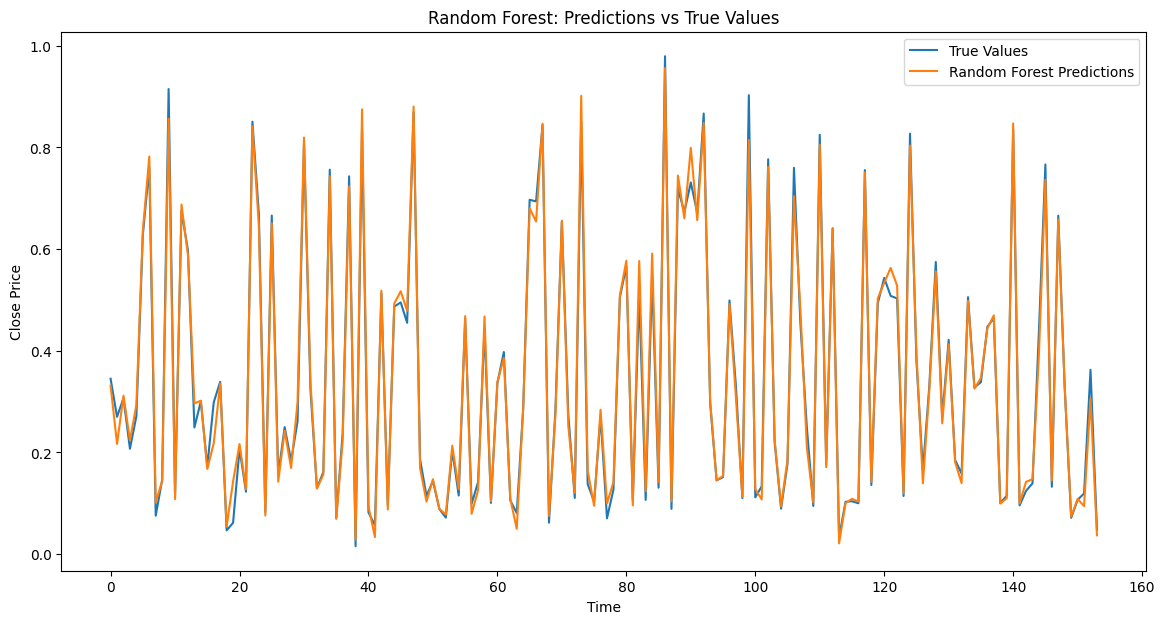

In [36]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

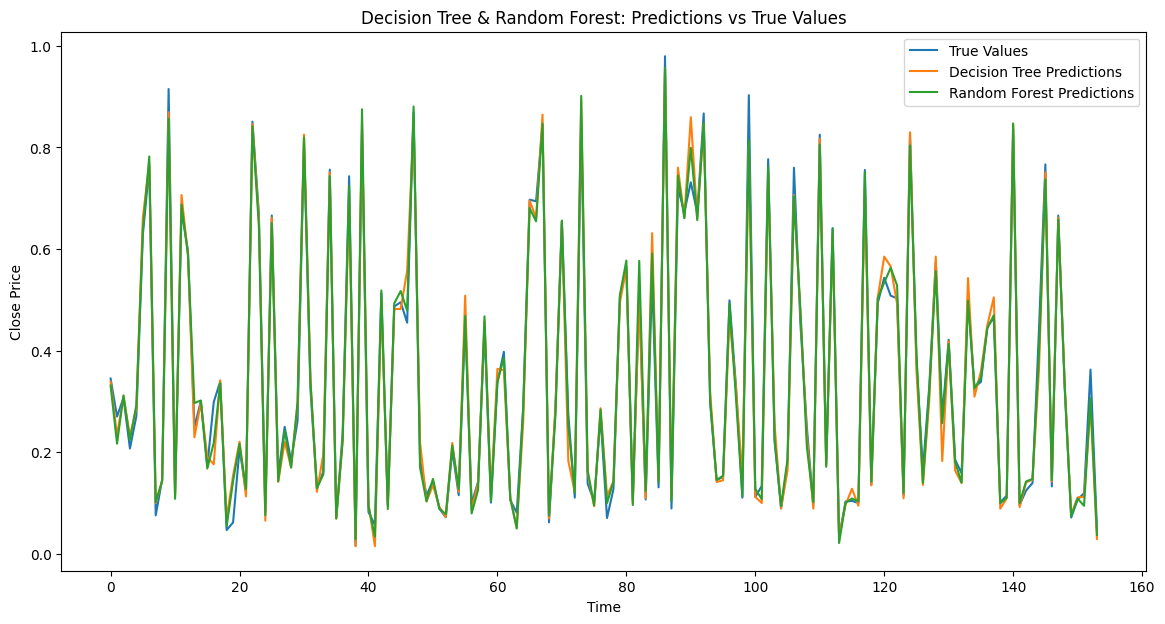

In [37]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()
